In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.pipeline import make_pipeline


### Logistic Regression 
The logistic - noted $\sigma(\cdot)$ is a *sigmoid function* (i.e., S-shaped) that outputs numbers between 0 and 1. It is defined as:

$$\sigma(t) = \frac{1}{1 + exp(-t)} = \frac{1}{1+e^{-t}}$$

In [2]:
np.random.seed(42)
m = 500

X = 20 * np.random.rand(m, 1) - 10

y_clean = 1 / (1 + np.exp(-X))
y_noisy = y_clean + 0.15 * np.random.randn(m, 1)

df  = pd.DataFrame({'Feature X':X.ravel(), 'Clean y':y_clean.ravel(), 'Noisy y':y_noisy.ravel()})

In [3]:
training_data = df[:400]
validation_data = df[400:]

In [4]:
X_train = training_data['Feature X'].values.reshape(-1, 1)
X_test = validation_data['Feature X'].values.reshape(-1, 1)

y_clean_train = training_data['Clean y'].values.reshape(-1, 1)
y_clean_test = validation_data['Clean y'].values.reshape(-1, 1)

y_noisy_train = training_data['Noisy y'].values.reshape(-1, 1)
y_noisy_test = validation_data['Noisy y'].values.reshape(-1, 1)

Text(0.5, 1.0, 'Logistic Regression Plot')

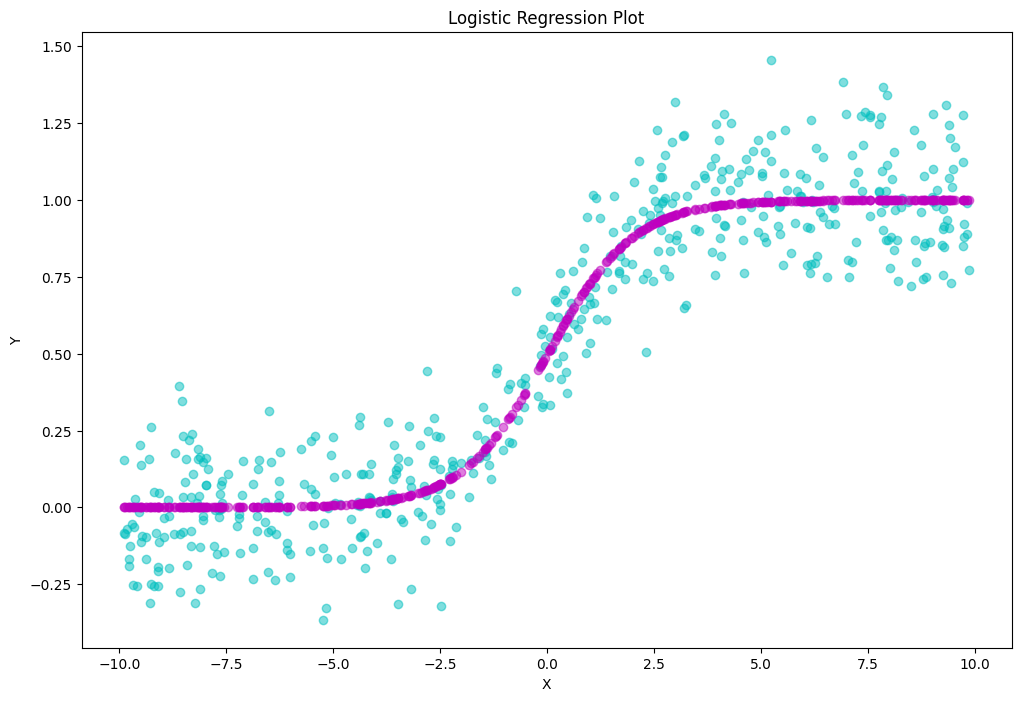

In [5]:
plt.figure(figsize=(12, 8))
plt.scatter(X, y_noisy, color='c', label="Noisy Data", alpha=0.5,)
plt.scatter(X, y_clean, color='m', label="Clean Data", alpha=0.5)
plt.ylabel("Y")
plt.xlabel("X")
plt.title("Logistic Regression Plot")


In [6]:
def compute_RMSE(model, X_test, y_test):
    y_pred = model.predict(X_test)
    return np.round(np.sqrt(mean_squared_error(y_test, y_pred)), 4)

In [7]:
linear_clean = LinearRegression().fit(X_train, y_clean_train)
linear_noisy = LinearRegression().fit(X_train, y_noisy_train)

rmse_linear_clean = compute_RMSE(linear_clean, X_test, y_clean_test)
rmse_linear_noisy = compute_RMSE(linear_noisy, X_test, y_noisy_test)

print(f"Linear Model RMSE (Clean): {rmse_linear_clean}")
print(f"Linear Model RMSE (Noisy): {rmse_linear_noisy}")

Linear Model RMSE (Clean): 0.1597
Linear Model RMSE (Noisy): 0.2264


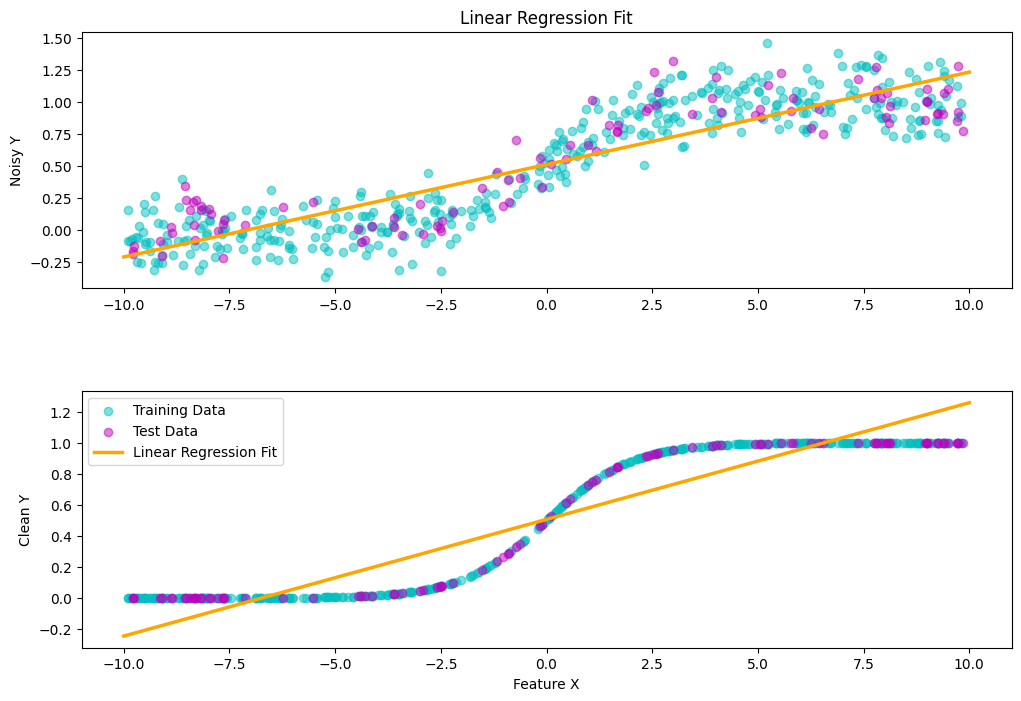

In [8]:
x_range = np.linspace(-10, 10, 500).reshape(-1, 1)
y_pred_clean = linear_clean.predict(x_range)
y_pred_noisy = linear_noisy.predict(x_range)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.scatter(X_train, y_noisy_train, color='c', label="Training Data", alpha=0.5)
plt.scatter(X_test, y_noisy_test, color='m', label="Test Data", alpha=0.5)
plt.plot(x_range, y_pred_clean, color='orange', label="Linear Regression Fit", linewidth = 2.5)
plt.ylabel("Noisy Y")
plt.title("Linear Regression Fit")

plt.subplot(2, 1, 2)
plt.scatter(X_train, y_clean_train, color='c', label="Training Data", alpha=0.5)
plt.scatter(X_test, y_clean_test, color='m', label="Test Data", alpha=0.5)
plt.plot(x_range, y_pred_noisy, color='orange', label="Linear Regression Fit", linewidth = 2.5)
plt.xlabel("Feature X")
plt.ylabel("Clean Y")
plt.legend()

plt.subplots_adjust(hspace=0.4)

plt.show()

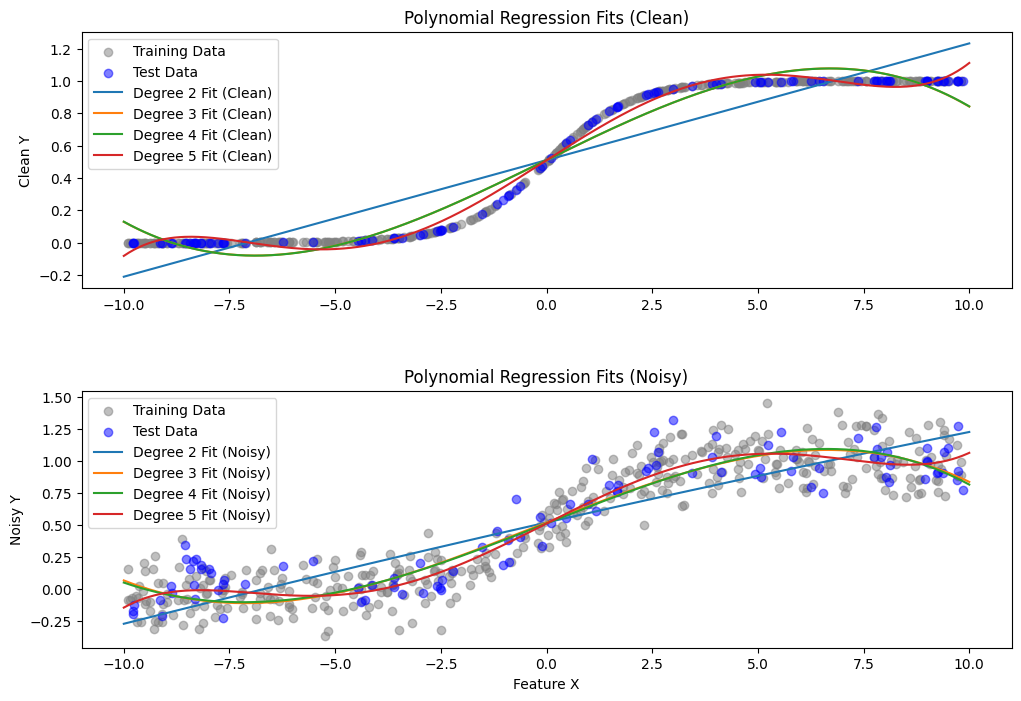

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

degrees = [2, 3, 4, 5]
rmse_results = {}

x_range = np.linspace(-10, 10, 500).reshape(-1, 1)

plt.figure(figsize=(12, 8))

# First subplot: Clean dataset
plt.subplot(2, 1, 1)
plt.scatter(X_train, y_clean_train, color='gray', label="Training Data", alpha=0.5)
plt.scatter(X_test, y_clean_test, color='blue', label="Test Data", alpha=0.5)

for d in degrees:
    poly_model_clean = make_pipeline(PolynomialFeatures(d), LinearRegression())
    poly_model_clean.fit(X_train, y_clean_train)
    y_pred_clean = poly_model_clean.predict(x_range)

    rmse_clean = compute_RMSE(poly_model_clean, X_test, y_clean_test)
    rmse_results[d] = (rmse_clean, None)  # Noisy RMSE will be added later

    plt.plot(x_range, y_pred_clean, label=f"Degree {d} Fit (Clean)")

plt.ylabel("Clean Y")
plt.title("Polynomial Regression Fits (Clean)")
plt.legend()

# Second subplot: Noisy dataset
plt.subplot(2, 1, 2)
plt.scatter(X_train, y_noisy_train, color='gray', label="Training Data", alpha=0.5)
plt.scatter(X_test, y_noisy_test, color='blue', label="Test Data", alpha=0.5)

for d in degrees:
    poly_model_noisy = make_pipeline(PolynomialFeatures(d), LinearRegression())
    poly_model_noisy.fit(X_train, y_noisy_train)
    y_pred_noisy = poly_model_noisy.predict(x_range)

    rmse_noisy = compute_RMSE(poly_model_noisy, X_test, y_noisy_test)
    rmse_results[d] = (rmse_results[d][0], rmse_noisy)  # Update with noisy RMSE

    plt.plot(x_range, y_pred_noisy, label=f"Degree {d} Fit (Noisy)")

plt.xlabel("Feature X")
plt.ylabel("Noisy Y")
plt.title("Polynomial Regression Fits (Noisy)")
plt.legend()

plt.subplots_adjust(hspace=0.4)
plt.show()


In [10]:
for d, (rmse_clean, rmse_noisy) in rmse_results.items():
  print(f"Clean RMSE for degree {d} was: {rmse_clean}")
  print(f"Noisy RMSE for degree {d} was: {rmse_noisy}\n")

Clean RMSE for degree 2 was: 0.1597
Noisy RMSE for degree 2 was: 0.2251

Clean RMSE for degree 3 was: 0.078
Noisy RMSE for degree 3 was: 0.1731

Clean RMSE for degree 4 was: 0.0779
Noisy RMSE for degree 4 was: 0.173

Clean RMSE for degree 5 was: 0.0415
Noisy RMSE for degree 5 was: 0.1456



In [11]:
alpha = 0.1  # Regularization strength

for d in degrees:
    ridge_clean = make_pipeline(PolynomialFeatures(d), Ridge(alpha=alpha))
    ridge_noisy = make_pipeline(PolynomialFeatures(d), Ridge(alpha=alpha))
    
    lasso_clean = make_pipeline(PolynomialFeatures(d), Lasso(alpha=alpha, max_iter=5000))
    lasso_noisy = make_pipeline(PolynomialFeatures(d), Lasso(alpha=alpha, max_iter=5000))

    ridge_clean.fit(X_train, y_clean_train)
    ridge_noisy.fit(X_train, y_noisy_train)
    lasso_clean.fit(X_train, y_clean_train)
    lasso_noisy.fit(X_train, y_noisy_train)

    rmse_ridge_clean = compute_RMSE(ridge_clean, X_test, y_clean_test)
    rmse_ridge_noisy = compute_RMSE(ridge_noisy, X_test, y_noisy_test)
    
    rmse_lasso_clean = compute_RMSE(lasso_clean, X_test, y_clean_test)
    rmse_lasso_noisy = compute_RMSE(lasso_noisy, X_test, y_noisy_test)

    print(f"Degree {d} Ridge RMSE (Clean): {rmse_ridge_clean}")
    print(f"Degree {d} Ridge RMSE (Noisy): {rmse_ridge_noisy}")
    print(f"Degree {d} LASSO RMSE (Clean): {rmse_lasso_clean}")
    print(f"Degree {d} LASSO RMSE (Noisy): {rmse_lasso_noisy}\n")


Degree 2 Ridge RMSE (Clean): 0.1597
Degree 2 Ridge RMSE (Noisy): 0.2251
Degree 2 LASSO RMSE (Clean): 0.1564
Degree 2 LASSO RMSE (Noisy): 0.2204

Degree 3 Ridge RMSE (Clean): 0.078
Degree 3 Ridge RMSE (Noisy): 0.1731
Degree 3 LASSO RMSE (Clean): 0.0868
Degree 3 LASSO RMSE (Noisy): 0.1753

Degree 4 Ridge RMSE (Clean): 0.0779
Degree 4 Ridge RMSE (Noisy): 0.173
Degree 4 LASSO RMSE (Clean): 0.0871
Degree 4 LASSO RMSE (Noisy): 0.1749

Degree 5 Ridge RMSE (Clean): 0.0415
Degree 5 Ridge RMSE (Noisy): 0.1456
Degree 5 LASSO RMSE (Clean): 0.0877
Degree 5 LASSO RMSE (Noisy): 0.1784



In [12]:
degree = 20
lasso_20 = make_pipeline(PolynomialFeatures(degree), Lasso(alpha=alpha, max_iter=10000))
lasso_20.fit(X_train, y_noisy_train)

# Count nonzero coefficients
lasso_coef = lasso_20.named_steps["lasso"].coef_
num_nonzero = np.count_nonzero(lasso_coef)

print(f"Degree 20 LASSO: {degree + 1 - num_nonzero} zero coefficients out of {degree + 1}")

Degree 20 LASSO: 2 zero coefficients out of 21


c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.207e+00, tolerance: 9.619e-03
  model = cd_fast.enet_coordinate_descent(


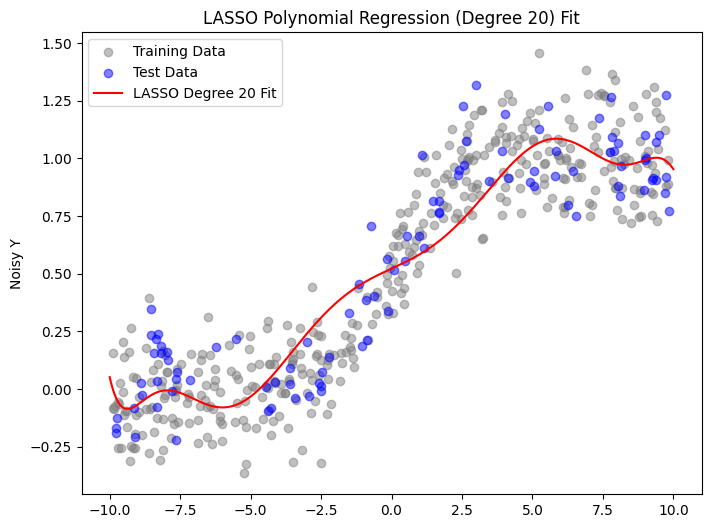

In [13]:
x_range = np.linspace(-10, 10, 500).reshape(-1, 1)
y_pred = lasso_20.predict(x_range)

plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_noisy_train, color='gray', label="Training Data", alpha=0.5)
plt.scatter(X_test, y_noisy_test, color='blue', label="Test Data", alpha=0.5)
plt.plot(x_range, y_pred, color='red', label="LASSO Degree 20 Fit")
plt.ylabel("Noisy Y")
plt.title("LASSO Polynomial Regression (Degree 20) Fit")
plt.legend()

c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.871e-01, tolerance: 1.148e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.786e+00, tolerance: 1.926e-03
  model = cd_fast.enet_coordinate_descent(
c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation.

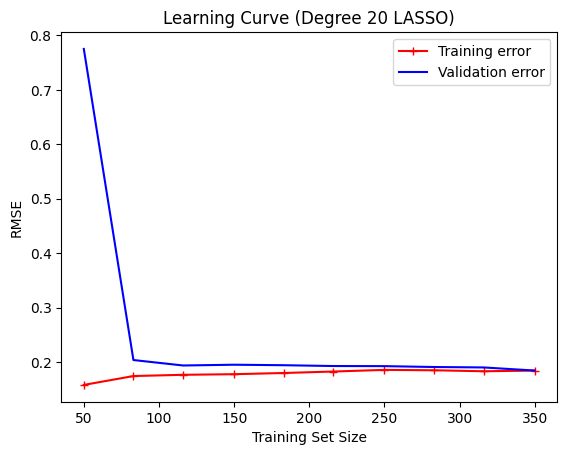

In [14]:
from sklearn.model_selection import train_test_split

train_sizes = np.linspace(50, 350, 10, dtype=int)
train_errors, val_errors = [], []

for size in train_sizes:
    X_partial, _, y_partial, _ = train_test_split(X_train, y_noisy_train, train_size=size, random_state=42)
    model = make_pipeline(PolynomialFeatures(20), Lasso(alpha=alpha, max_iter=10000))
    model.fit(X_partial, y_partial)

    train_errors.append(compute_RMSE(model, X_partial, y_partial))
    val_errors.append(compute_RMSE(model, X_test, y_noisy_test))

plt.plot(train_sizes, train_errors, "r-+", label="Training error")
plt.plot(train_sizes, val_errors, "b-", label="Validation error")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
plt.title("Learning Curve (Degree 20 LASSO)")
plt.legend()
plt.show()


In [15]:
def create_svr_regression(y_train, y_test, data_type):
    degrees = [2, 3, 4, 5]
    svr_models = {}
    results = {}

    for degree in degrees:
        pipeline = make_pipeline(StandardScaler(), SVR(kernel="poly", degree=degree, C=1.0, epsilon=0.1))
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        svr_models[degree] = pipeline
        results[f"SVR (Poly Degree {degree})"] = {
            "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        }

        x_range = np.linspace(min(X_train), max(X_train), 100).reshape(-1, 1)
        
        y_smooth_pred = pipeline.predict(x_range)
        
              
        plt.figure(figsize=(6, 4))
        plt.scatter(X_train, y_train, color='gray', label="Training Data", alpha=0.5)
        plt.scatter(X_test, y_test, color='blue', label="Test Data", alpha=0.5)
        plt.plot(x_range, y_smooth_pred, color='red', label=f"SVR Degree {degree}")
        plt.legend()
        plt.title(f"SVR Regression (Degree {degree})")
        plt.xlabel("X")
        plt.ylabel("y")
        plt.show()

        

    # linear regression
    lin_reg_pipeline = make_pipeline(StandardScaler(), LinearRegression())
    lin_reg_pipeline.fit(X_train, y_train)
    y_pred_lin = lin_reg_pipeline.predict(X_test)

    results["Linear Regression"] = {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lin)),
    }

    # Print results
    print(f'For the {data_type} Y data:')
    for model, metrics in results.items():
        print(f"{model}: RMSE = {metrics['RMSE']:.4f}")


c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


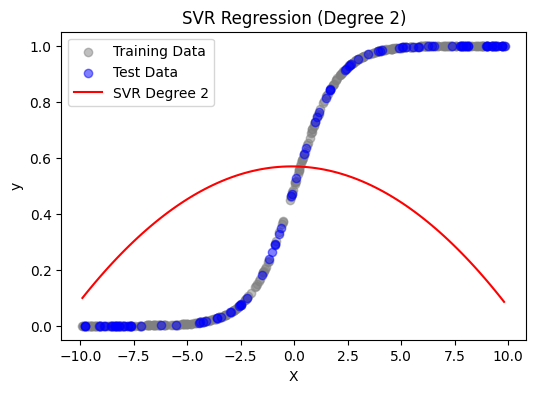

c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


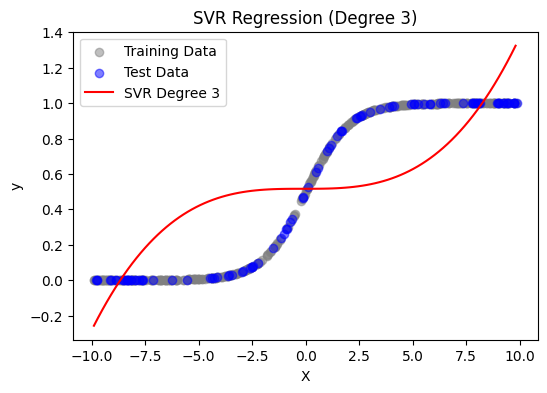

c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


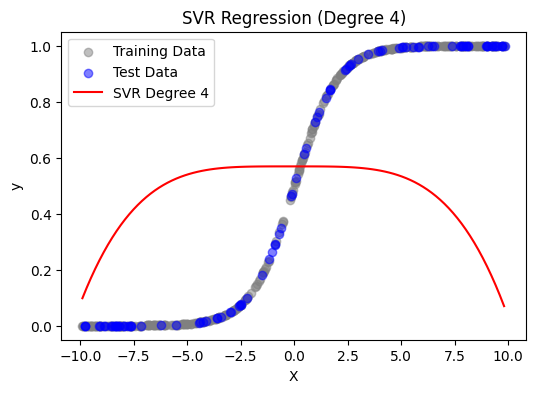

c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


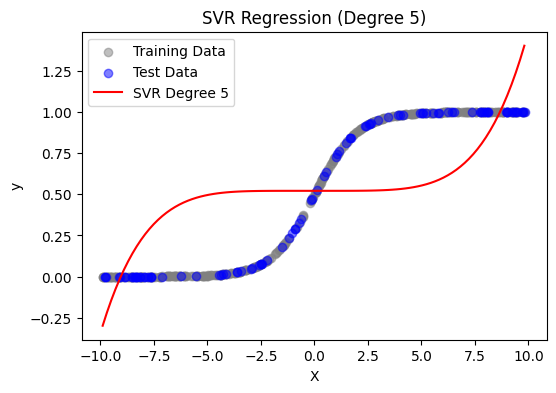

For the Clean Y data:
SVR (Poly Degree 2): RMSE = 0.5107
SVR (Poly Degree 3): RMSE = 0.2780
SVR (Poly Degree 4): RMSE = 0.4972
SVR (Poly Degree 5): RMSE = 0.3203
Linear Regression: RMSE = 0.1597


In [16]:
create_svr_regression(y_clean_train, y_clean_test, "Clean")

c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


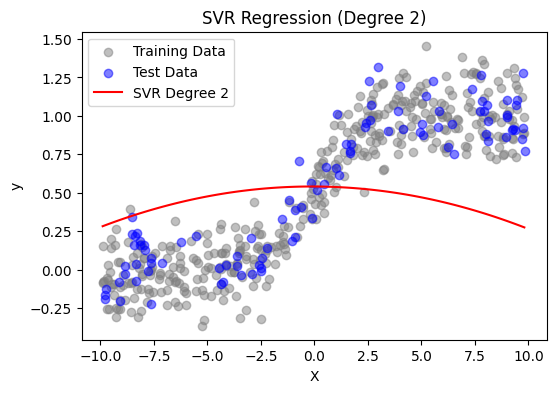

c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


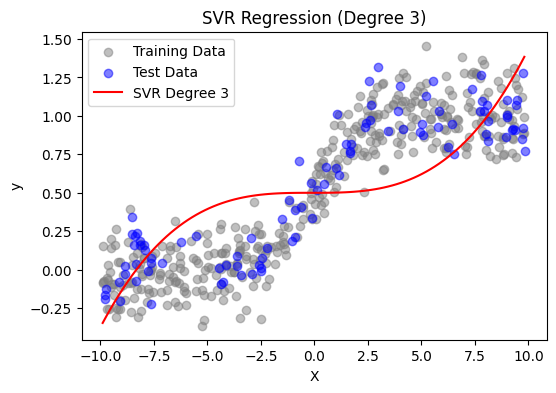

c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


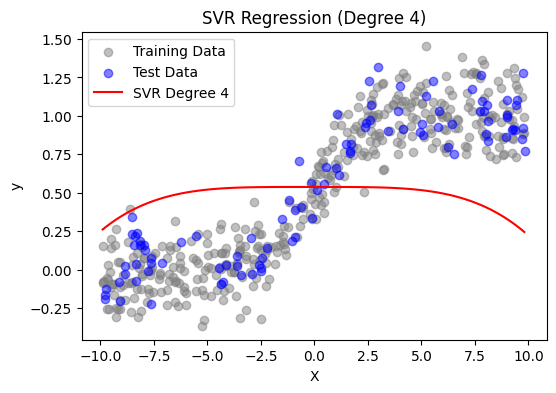

c:\Users\aweso\anaconda3\envs\cs120\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


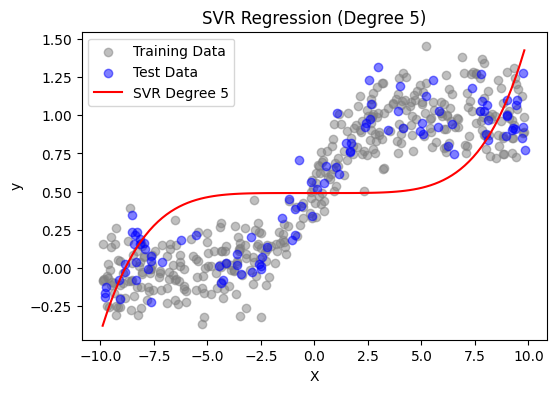

For the Noisy Y data:
SVR (Poly Degree 2): RMSE = 0.4836
SVR (Poly Degree 3): RMSE = 0.3180
SVR (Poly Degree 4): RMSE = 0.4801
SVR (Poly Degree 5): RMSE = 0.3470
Linear Regression: RMSE = 0.2264


In [17]:
create_svr_regression(y_noisy_train, y_noisy_test, "Noisy")

In [18]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [19]:
from sklearn.tree import DecisionTreeRegressor

depths = [2, 4, 6, 8, 10]
results = {}

In [20]:
for depth in depths:
    tree_pipeline = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_pipeline.fit(X_train, y_noisy_train)
    y_pred = tree_pipeline.predict(X_test)
    
    results[f"Decision Tree (Depth {depth})"] = {
        "RMSE": np.sqrt(mean_squared_error(y_noisy_test, y_pred)),
    }

In [21]:
from sklearn.tree import export_graphviz 
import os

export_graphviz(tree_pipeline, 
                out_file=os.path.join("C:/Users/aweso/OneDrive - Clark University/Year 3 Semester 2/DSCI 225 - Applied Machine Learning", "HW3_tree.dot"),
                feature_names=['X'], 
                class_names=['Noisy Y'], 
                rounded=True, 
                filled=True)

In [23]:
from graphviz import Source

# Correct Windows file path format
dot_file_path = r"C:/Users/aweso/OneDrive - Clark University/Year 3 Semester 2/DSCI 225 - Applied Machine Learning/HW3_tree.dot"

# Load the .dot file
Source.from_file(dot_file_path)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH